In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sb
from sklearn.cluster import KMeans
import random
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from skfuzzy.cluster import cmeans
import skfuzzy
%matplotlib inline

In [2]:
df = pd.read_csv("Dados_JPS_12B1.csv", sep = ',' ,decimal='.')
df.drop(columns='Unnamed: 6', inplace = True)
df.head()

,DIA,MES,ANO,HORA,MINUTO,Potencia
0,1,1,2008,0,0,7.9
1,1,1,2008,0,15,7.7
2,1,1,2008,0,30,7.7
3,1,1,2008,0,45,7.4
4,1,1,2008,1,0,7.4


In [3]:
df['Data'] = pd.to_datetime(df[['DIA','MES','ANO','HORA','MINUTO']]
                            .astype(str).apply(' '.join, 1), format='%d %m %Y %H %M')

In [4]:
df.set_index('Data', inplace=True)
df.drop(columns=['DIA','MES','ANO','HORA','MINUTO'], axis=1, inplace=True)
df.head()

,Potencia
Data,
2008-01-01 00:00:00,7.9
2008-01-01 00:15:00,7.7
2008-01-01 00:30:00,7.7
2008-01-01 00:45:00,7.4
2008-01-01 01:00:00,7.4


In [5]:
df.describe()

,Potencia
count,210432.000000
mean,12.297258
std,4.129985
min,0.000000
25%,9.200000
50%,11.300000
75%,14.900000
max,24.100000


In [6]:
df_max_2008= df['Potencia'].loc['2008']
df_max_2009= df['Potencia'].loc['2009']
df_max_2010= df['Potencia'].loc['2010']
df_max_2011= df['Potencia'].loc['2011']
df_max_2012= df['Potencia'].loc['2012']
df_max_2013= df['Potencia'].loc['2013']

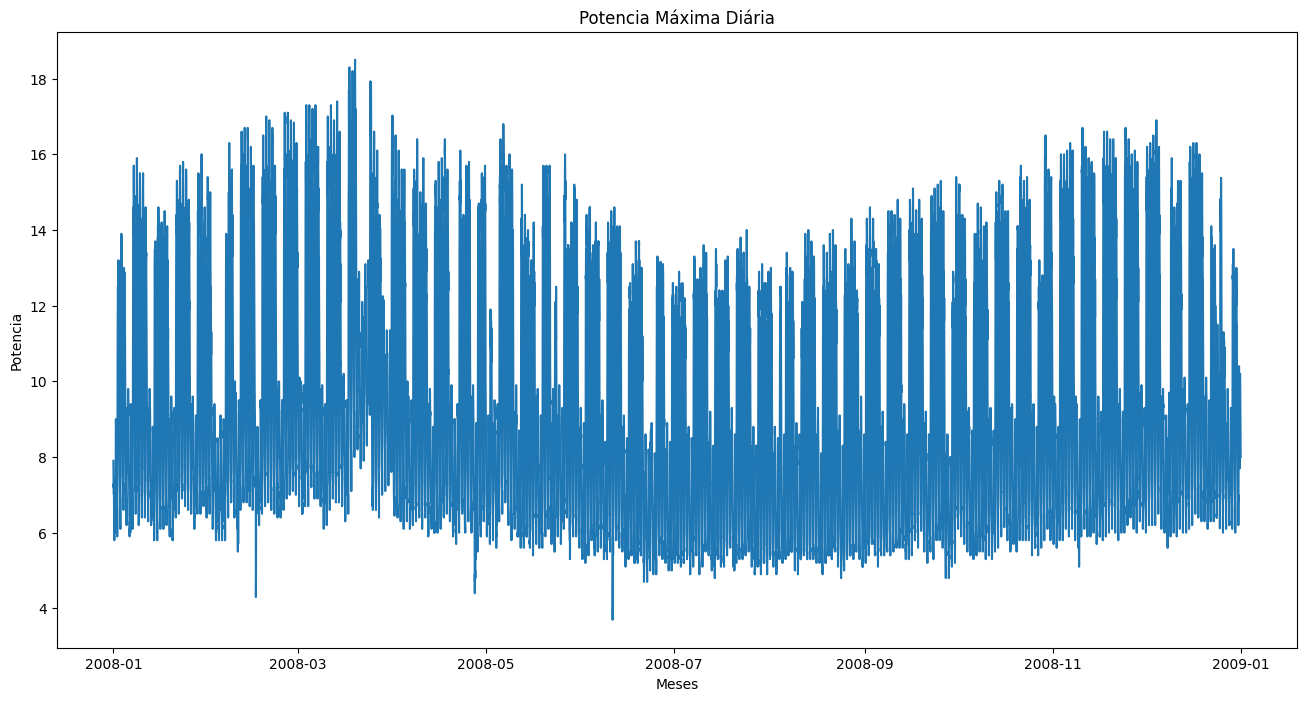

In [7]:
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max_2008)

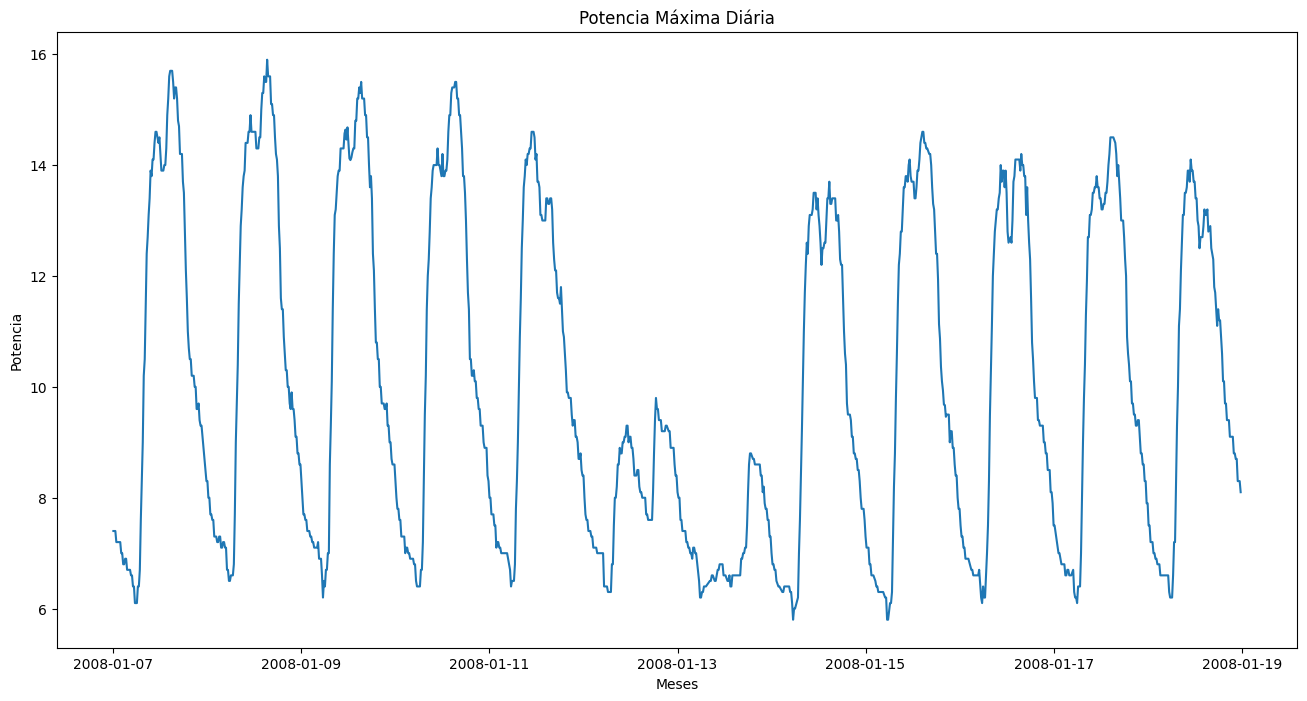

In [8]:
#dias = número de dias para plotar
dias = 18
df_max1 = df['Potencia'].iloc[576:dias*96]   
df_max2 = df['Potencia'].iloc[576:dias*96] 
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max1)

### Inserindo Outliers no periodo de 2008

In [9]:
df_max_2008.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 35136 entries, 2008-01-01 00:00:00 to 2008-12-31 23:45:00
Series name: Potencia
Non-Null Count  Dtype  
--------------  -----  
35136 non-null  float64
dtypes: float64(1)
memory usage: 549.0 KB


### Outliers min

In [10]:

N = 35136
num_outliers = int(0.02 * N)

# gerando aleatoriamente os índices das amostras de outliers
outlier_indices = random.sample(range(N), num_outliers)



In [11]:
for idx in outlier_indices:
    df_max_2008[idx] = 0

### Outliers max

In [12]:
N = 35136
num_outliers_pico = int(0.02 * N)

# gerando aleatoriamente os índices das amostras de outliers
outlier_indices_pico = random.sample(range(N), num_outliers_pico)

In [13]:
for idx in outlier_indices_pico:
    # amplitude aleatória entre 18 e 25
    amplitude = random.uniform(18, 25)
    df_max_2008[idx] = amplitude

### Plotando após inserir os outliers

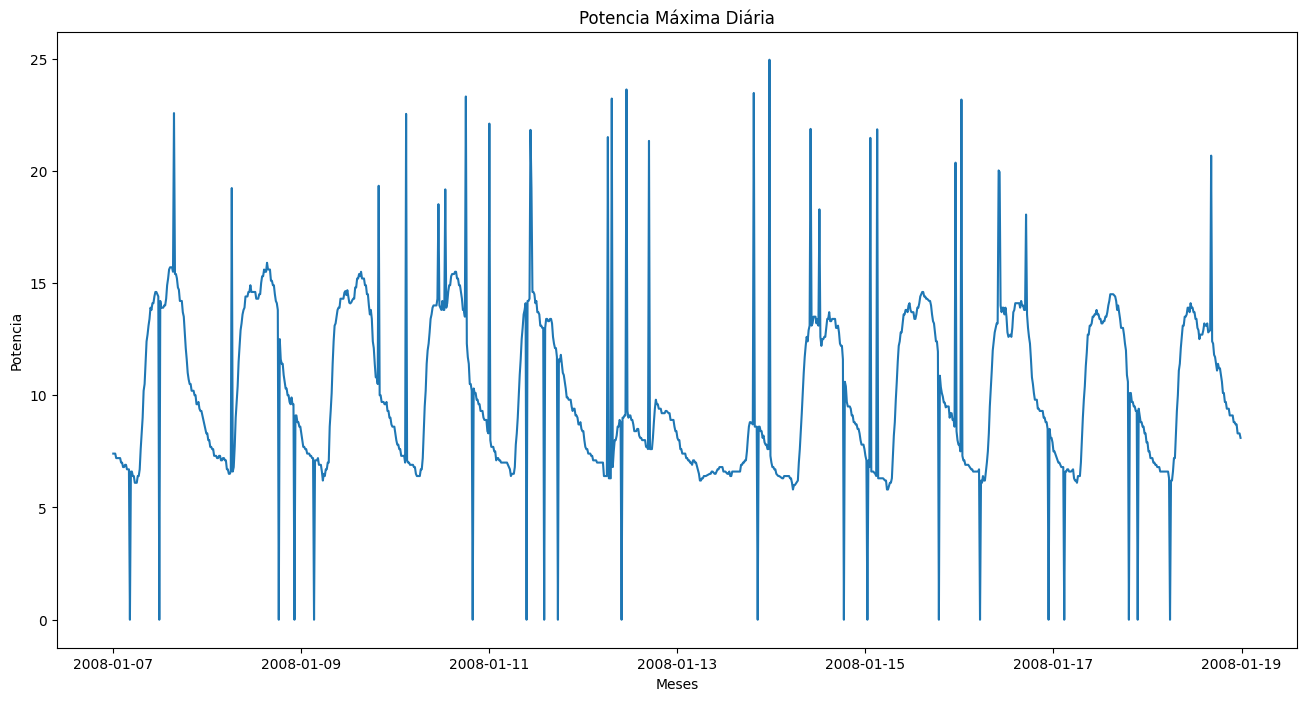

In [14]:
plt.figure(figsize=(16,8))
plt.title('Potencia Máxima Diária')
#plt.yticks([0,18])

plt.xlabel('Meses')
plt.ylabel('Potencia')
plt.plot(df_max1)

### Usando o método do cotovelo determinar o número ótimo de cluster para este conjunto de dados

In [15]:
potencia_array_2008 = df_max_2008.values.reshape(-1, 1)
potencia_array_2008

array([[7.9000001 ],
       [7.69999981],
       [7.69999981],
       ...,
       [8.39999962],
       [8.30000019],
       [8.        ]])

In [16]:
X = potencia_array_2008
inertia = []

# Teste o número de clusters de 1 a 10 (você pode ajustar esse intervalo)
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Text(0, 0.5, 'Inércia')

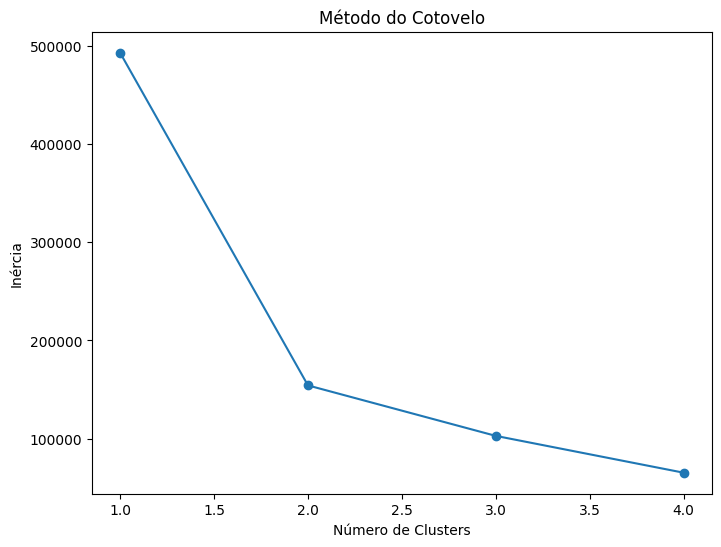

In [17]:
# Plote da curva de cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')

In [18]:
df_2008 = df_max_2008.to_frame()

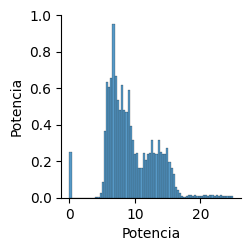

In [19]:
sb.pairplot(df_2008)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


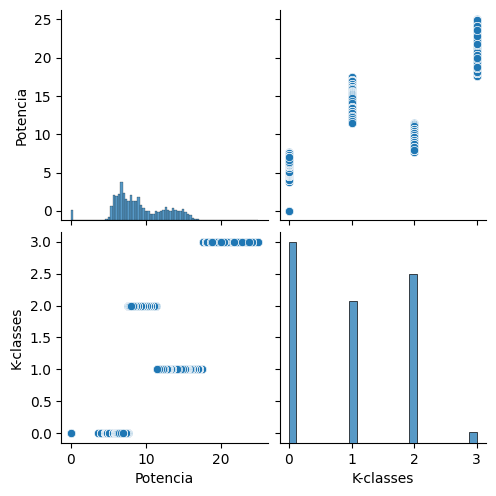

In [20]:
P = np.array(df_2008) 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(P)
kmeans.labels_

#centros dos clusters  [Centro  K-Classes]
#Neste caso o Centro=0, fornece como classe=3
#Portanto, deve filtrar posteriormente a classe 3 para extrair os outliers
kmeans.cluster_centers_

centroides=kmeans.cluster_centers_
#Pegando os labels(clusters) e colocando ao Dataframe df2
df_2008['K-classes'] = kmeans.labels_
df_2008.head()
sb.pairplot(df_2008)

In [21]:
centroides

array([[ 6.15825598],
       [13.74664477],
       [ 9.13291009],
       [21.27085982]])

In [22]:
Classe_Zero = np.argmin(centroides)
Classe_Zero   

0

In [23]:
Classe_Picos = np.argmax(centroides)
Classe_Picos 

3

In [24]:
#Filtrando Elementos com a classe que contem os ZEROS ou PROXIMOS DO ZERO
df_2008[df_2008['K-classes']==Classe_Zero]

,Potencia,K-classes
Data,,
2008-01-01 00:45:00,7.4,0
2008-01-01 01:00:00,7.4,0
2008-01-01 01:15:00,7.4,0
2008-01-01 01:30:00,7.4,0
2008-01-01 01:45:00,7.2,0
...,...,...
2008-12-31 07:00:00,6.7,0
2008-12-31 07:15:00,7.0,0
2008-12-31 10:00:00,0.0,0


In [25]:
#Filtrando Elementos com a classe que contem os PICOS POSITIVOS
df_2008[df_2008['K-classes']==Classe_Picos ]

,Potencia,K-classes
Data,,
2008-01-01 14:45:00,22.451480,3
2008-01-01 22:45:00,23.528915,3
2008-01-03 04:30:00,21.800593,3
2008-01-03 14:15:00,24.685270,3
2008-01-04 13:30:00,20.406880,3
...,...,...
2008-12-29 04:15:00,23.525625,3
2008-12-30 08:15:00,22.840086,3
2008-12-30 10:30:00,21.782142,3


# Métricas de avaliação do método de clusterização

In [26]:
k = 4  # Número de clusters desejado
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_2008)

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [27]:
labels = kmeans.labels_

#### Silhouette Score: O coeficiente de silhueta mede o quão bem os objetos estão agrupados em seus clusters. Um valor próximo de 1 indica que os objetos estão bem agrupados, enquanto um valor próximo de -1 indica que os objetos estão agrupados de forma inadequada. Um valor próximo de 0 significa que os clusters estão no caminho certo.

In [28]:
silhouette_avg = silhouette_score(df_2008, labels)


#### Calinski-Harabasz Index: O índice Calinski-Harabasz (também chamado de critério de variação entre clusters sobre a variação intracluster) mede a relação entre a dispersão média entre os clusters e a dispersão média dentro dos clusters. Valores mais altos do índice indicam clusters mais compactos e separados. Um índice Calinski-Harabasz maior é geralmente desejado, isso é um bom sinal de que a clusterização está separando efetivamente os dados em grupos distintos. 

In [29]:
calinski_harabasz = calinski_harabasz_score(df_2008, labels)

In [30]:
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')


Silhouette Score: 0.6504555943701343
Calinski-Harabasz Index: 81617.89000739618


# Implementar um novo método de clusterização baseado em lógica fuzzy, como por exemplo: Fuzzy C-means,

In [33]:
df_2008["Variacao_Potencia"] = df_2008["Potencia"].diff()
df_2008["Variacao_Potencia"].fillna(0, inplace=True)

In [50]:
df_2008.reset_index(inplace=True)

In [53]:
display(df_2008)

,Data,Potencia,K-classes,Variacao_Potencia
0,2008-01-01 00:00:00,7.9,2,0.000000
1,2008-01-01 00:15:00,7.7,2,-0.200000
2,2008-01-01 00:30:00,7.7,2,0.000000
3,2008-01-01 00:45:00,7.4,0,-0.300000
4,2008-01-01 01:00:00,7.4,0,0.000000
...,...,...,...,...
35131,2008-12-31 22:45:00,8.7,2,0.000000
35132,2008-12-31 23:00:00,8.4,2,-0.300000
35133,2008-12-31 23:15:00,8.4,2,0.000000
35134,2008-12-31 23:30:00,8.3,2,-0.099999


In [62]:
X = df_2008.iloc[:,[1,3]].values

In [63]:
X

array([[ 7.9000001 ,  0.        ],
       [ 7.69999981, -0.20000029],
       [ 7.69999981,  0.        ],
       ...,
       [ 8.39999962,  0.        ],
       [ 8.30000019, -0.09999943],
       [ 8.        , -0.30000019]])

In [65]:
X.T.shape

(2, 35136)

In [66]:
r = skfuzzy.cmeans(data = X.T, c = 4, m=2,error = 0.005, maxiter = 1000, init = None)

In [68]:
r

(array([[12.13958219,  0.05719838],
        [14.88625625,  0.20526472],
        [ 8.76945484, -0.05036991],
        [ 6.39581282, -0.08485724]]),
 array([[0.03031238, 0.03347014, 0.03320051, ..., 0.00948634, 0.01395155,
         0.02912562],
        [0.01115531, 0.01277652, 0.01266314, ..., 0.00315082, 0.00473924,
         0.01054658],
        [0.71844929, 0.56761307, 0.57097059, ..., 0.95438727, 0.92449316,
         0.76839123],
        [0.24008302, 0.38614027, 0.38316576, ..., 0.03297557, 0.05681605,
         0.19193657]]),
 array([[0.36280802, 0.42736592, 0.32295977, ..., 0.20079783, 0.23277397,
         0.37660691],
        [0.33367119, 0.01679769, 0.23367203, ..., 0.15926751, 0.41986756,
         0.12882363],
        [0.0436833 , 0.36428614, 0.25653979, ..., 0.19037124, 0.0445182 ,
         0.12118712],
        [0.2598375 , 0.19155025, 0.18682841, ..., 0.44956343, 0.30284027,
         0.37338234]]),
 array([[4.23996792, 4.44702629, 4.43995083, ..., 3.74001998, 3.8427986 ,
        

In [69]:
previsoes_porcentagem = r[1]

In [70]:
previsoes_porcentagem.shape

(4, 35136)

In [76]:
previsoes_porcentagem

array([[0.03031238, 0.03347014, 0.03320051, ..., 0.00948634, 0.01395155,
        0.02912562],
       [0.01115531, 0.01277652, 0.01266314, ..., 0.00315082, 0.00473924,
        0.01054658],
       [0.71844929, 0.56761307, 0.57097059, ..., 0.95438727, 0.92449316,
        0.76839123],
       [0.24008302, 0.38614027, 0.38316576, ..., 0.03297557, 0.05681605,
        0.19193657]])

In [79]:
previsoes_porcentagem[0][0]

0.03031238359447577

In [80]:
previsoes_porcentagem[1][0]

0.011155305647232808

In [81]:
previsoes_porcentagem[2][0]

0.7184492925698103

In [82]:
previsoes_porcentagem[3][0]

0.24008301818848124

In [84]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0] + previsoes_porcentagem[3][0]

1.0000000000000002

In [85]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [88]:
previsoes

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

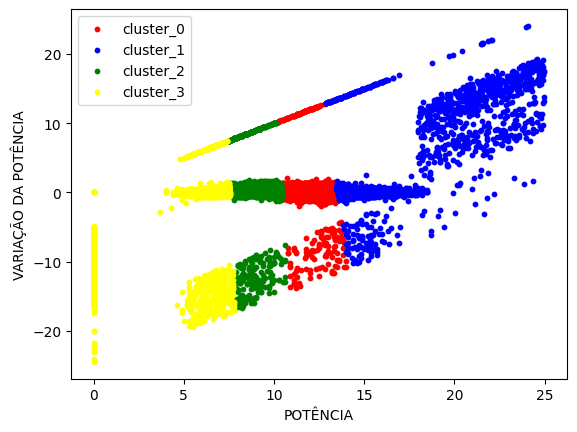

In [90]:
plt.scatter(X[previsoes == 0, 0], X[previsoes ==0,1], s = 10, c = 'red', label = 'cluster_0')
plt.scatter(X[previsoes == 1, 0], X[previsoes ==1,1], s = 10, c = 'blue', label = 'cluster_1')
plt.scatter(X[previsoes == 2, 0], X[previsoes ==2,1], s = 10, c = 'green', label = 'cluster_2')
plt.scatter(X[previsoes == 3, 0], X[previsoes ==3,1], s = 10, c = 'yellow', label = 'cluster_3')
plt.xlabel("POTÊNCIA")
plt.ylabel("VARIAÇÃO DA POTÊNCIA")
plt.legend() 